<a href="https://colab.research.google.com/github/CodeitVasu/Bangalore_price_prediction/blob/main/Bangalore_houses_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving banglore.csv to banglore.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('banglore.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [7]:
df.groupby('area_type').describe()

bath                                                \
                       count      mean       std  min  25%  50%  75%   max   
area_type                                                                    
Built-up  Area        2410.0  2.649378  1.250774  1.0  2.0  2.0  3.0  10.0   
Carpet  Area            87.0  2.505747  1.170108  1.0  2.0  2.0  3.0   9.0   
Plot  Area            2009.0  3.893479  2.022681  1.0  3.0  4.0  5.0  40.0   
Super built-up  Area  8741.0  2.430386  0.970320  1.0  2.0  2.0  3.0  27.0   

                     balcony            ...             price              \
                       count      mean  ...  75%  max   count        mean   
area_type                               ...                                 
Built-up  Area        2310.0  1.472727  ...  2.0  3.0  2418.0  104.285498   
Carpet  Area            82.0  1.402439  ...  2.0  3.0    87.0   89.502356   
Plot  Area            1837.0  1.392488  ...  2.0  3.0  2025.0  208.495486   
Super built-up  Area  8482.0  1.658100  ...  2.0  3.0  8790.0   92.971757   

                                                                          
                             std    min      25%    50%      75%     max  
area_type                                                                 
Built-up  Area        109.270222   9.00  47.0000   70.0  120.000  2050.0  
Carpet  Area           73.446012  13.00  47.7025   70.0  100.000   500.0  
Plot  Area            253.311895   8.44  85.0000  140.0  240.000  3600.0  
Super built-up  Area  113.971214   8.00  47.2500   65.0   98.195  2912.0  

[4 rows x 24 columns]

In [8]:
dfx = df.drop(['area_type','society','balcony','availability'],axis='columns')
dfx

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
dfx.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
dfy = dfx.dropna()
dfy.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
dfy.shape

(13246, 5)

In [12]:
dfy['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
dfy['BHK']=dfy['size'].apply(lambda x: int(x.split(' ')[0]))
dfy

<ipython-input-13-fe4ed316301d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['BHK']=dfy['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
dfy['location'][100:110]

102                Kothanur
103       Green View Layout
104    Shantiniketan Layout
105                  Peenya
106              Nagarbhavi
107            Rajaji Nagar
108          Jalahalli West
109             Devanahalli
110      Lakshmiamma Garden
111         Byatarayanapura
Name: location, dtype: object

In [15]:
dfy['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
dfy[dfy.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
dfy.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_flt(x):
  try:
    float(x)
  except:
    return False
  return True
  


In [19]:
#total_sqft having range 
dfy[~dfy['total_sqft'].apply(is_flt)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def cov(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [21]:
cov('231')

231.0

In [22]:
cov('2100-2850')

2475.0

In [23]:
dfy['total_sqft']=dfy.total_sqft.apply(cov)
dfy

<ipython-input-23-2fec6ff136b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy['total_sqft']=dfy.total_sqft.apply(cov)


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [24]:
dfy['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [25]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   BHK         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [26]:
dfy.dropna()


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [27]:
dfz = dfy.copy()
dfz['pp_sqft']=dfz['price']*100000/dfz['total_sqft']
dfz

,location,size,total_sqft,bath,price,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [28]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   BHK         13246 non-null  int64  
 6   pp_sqft     13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [29]:
dfz.dropna()

,location,size,total_sqft,bath,price,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [30]:
len(dfz.location.unique())

1304

In [31]:
dfz.location=dfz.location.apply(lambda x: x.strip())
location_stats = dfz.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [32]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
loc_lessthan10 = (location_stats[location_stats<=10])

In [34]:
dfz.location = dfz.location.apply(lambda x: 'others' if x in loc_lessthan10 else x)
len(dfz.location.unique())

242

In [35]:
dfz.head(20)

,location,size,total_sqft,bath,price,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [36]:
dfz['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [37]:
def rep(x):
  if x.split(' ')[1]=='Bedroom':
    try:
      return x.split(' ')[0]+' '+'BHK'
    except:
      return x
  else:
    return x

In [38]:
dfz['size']=dfz['size'].apply(rep)

In [39]:
dfz

,location,size,total_sqft,bath,price,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 BHK,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [40]:
def check(x):
  count = 0
  if len(x.split(' '))!=2:
    count = count+1

  return count
    


In [41]:
for i in dfz['size']:
  if check(i)!=0:
    print(i)

all sizes are in the same format

In [42]:
dfz

,location,size,total_sqft,bath,price,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 BHK,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [43]:
dft = dfz.copy()
dft.drop(['total_sqft','price'],axis=1)

,location,size,bath,BHK,pp_sqft
0,Electronic City Phase II,2 BHK,2.0,2,3699.810606
1,Chikka Tirupathi,4 BHK,5.0,4,4615.384615
2,Uttarahalli,3 BHK,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,3,6245.890861
4,Kothanur,2 BHK,2.0,2,4250.000000
...,...,...,...,...,...
13315,Whitefield,5 BHK,4.0,5,6689.834926
13316,others,4 BHK,5.0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,2,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,4,10407.336319


In [44]:
import matplotlib.pyplot as plt

In [45]:
def tra(x):
  try:
    return int(x.split(' ')[0])
  except:
    return True


In [46]:
dfz['beds']=dfz['size'].apply(tra)
dfz['beds']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: beds, Length: 13246, dtype: int64

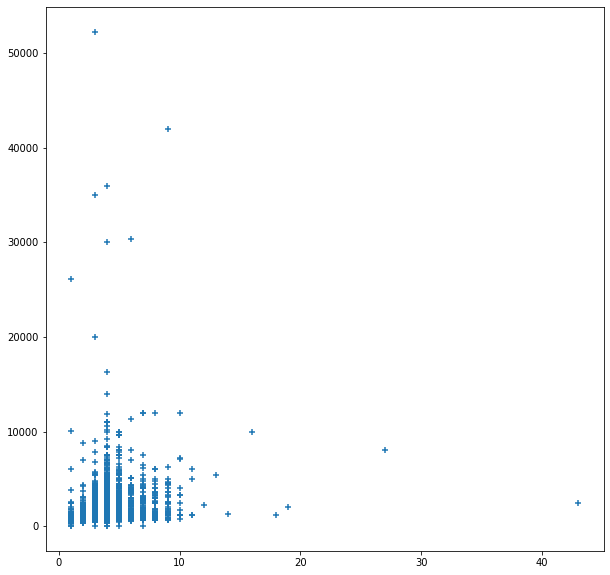

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(dfz.beds,dfz.total_sqft,marker='+')

In [48]:
dfz['per_bed']=dfz['total_sqft']/dfz['beds']
dfz

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,2,528.00
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615,4,650.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,3,480.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,3,507.00
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,2,600.00
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 BHK,3453.0,4.0,231.00,5,6689.834926,5,690.60
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111,4,900.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,2,570.50
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,4,1172.25


In [49]:
dfz['per_bed'].describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
Name: per_bed, dtype: float64

In [50]:
dfw = dfz[~(dfz['per_bed']<300)]
dfw

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,2,528.00
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4,4615.384615,4,650.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,3,480.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,3,507.00
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,2,600.00
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 BHK,3453.0,4.0,231.00,5,6689.834926,5,690.60
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111,4,900.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,2,570.50
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,4,1172.25


In [51]:
def remove_outlier(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
        m = np.mean(subdf.pp_sqft)
        st = np.std(subdf.pp_sqft)
        reduced_df = subdf[(subdf.pp_sqft>(m-st)) & (subdf.pp_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [52]:
df_net = remove_outlier(dfw)
df_net

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860,4,712.500000
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491,3,543.333333
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333,3,625.000000
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333,3,400.000000
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668,2,617.500000
...,...,...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.081301,2,676.500000
10237,others,1 BHK,812.0,1.0,26.00,1,3201.970443,1,812.000000
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.583333,3,480.000000
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.116279,2,537.500000


In [53]:
df_net.drop(['size','pp_sqft','beds','per_bed'],axis=1)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
10236,others,1353.0,2.0,110.00,2
10237,others,812.0,1.0,26.00,1
10238,others,1440.0,2.0,63.93,3
10239,others,1075.0,2.0,48.00,2


In [54]:
import matplotlib.pyplot as plt
import matplotlib

In [55]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

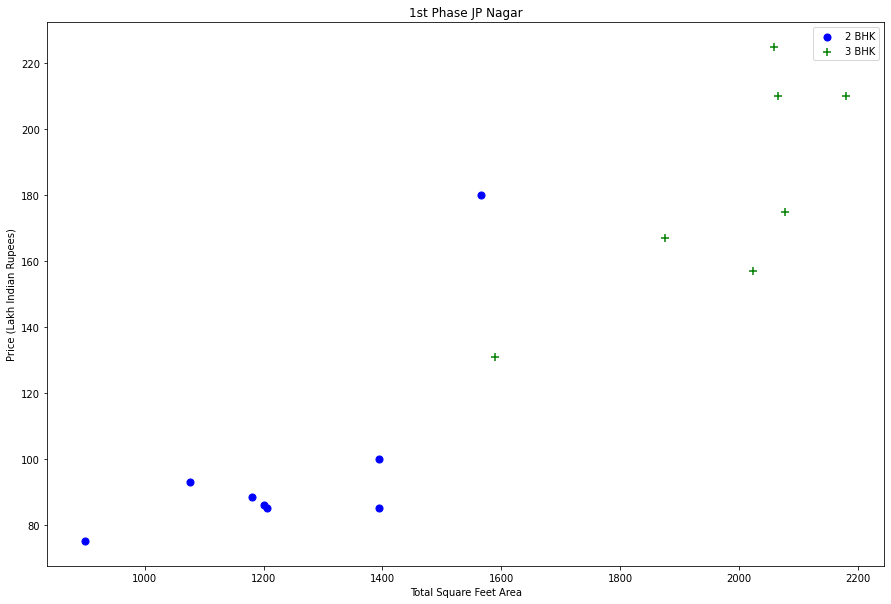

In [56]:
plot_scatter_chart(df_net,'1st Phase JP Nagar')

In [57]:
df_net.query('total_sqft > 2000 and bath<=3')

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed
11,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996,3,674.666667
12,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,10927.634774,3,686.333333
18,1st Phase JP Nagar,3 BHK,2180.0,3.0,210.0,3,9633.027523,3,726.666667
22,1st Phase JP Nagar,3 BHK,2077.0,3.0,175.0,3,8425.613866,3,692.333333
23,1st Phase JP Nagar,4 BHK,4550.0,2.0,240.0,4,5274.725275,4,1137.500000
...,...,...,...,...,...,...,...,...,...
10141,others,3 BHK,2400.0,3.0,185.0,3,7708.333333,3,800.000000
10144,others,4 BHK,3500.0,3.0,425.0,4,12142.857143,4,875.000000
10154,others,3 BHK,2250.0,3.0,180.0,3,8000.000000,3,750.000000
10190,others,3 BHK,2292.0,2.0,285.0,3,12434.554974,3,764.000000


In [58]:
onehot = pd.get_dummies(df_net.location)
onehot

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df11 = pd.concat([df_net,onehot],axis=1)
df11

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860,4,712.500000,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491,3,543.333333,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333,3,625.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333,3,400.000000,1,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668,2,617.500000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.081301,2,676.500000,0,...,0,0,0,0,0,0,0,0,0,1
10237,others,1 BHK,812.0,1.0,26.00,1,3201.970443,1,812.000000,0,...,0,0,0,0,0,0,0,0,0,1
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.583333,3,480.000000,0,...,0,0,0,0,0,0,0,0,0,1
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.116279,2,537.500000,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df12 = df11.drop(['others'],axis=1)
df12

,location,size,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860,4,712.500000,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491,3,543.333333,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333,3,625.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333,3,400.000000,1,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668,2,617.500000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,others,2 BHK,1353.0,2.0,110.00,2,8130.081301,2,676.500000,0,...,0,0,0,0,0,0,0,0,0,0
10237,others,1 BHK,812.0,1.0,26.00,1,3201.970443,1,812.000000,0,...,0,0,0,0,0,0,0,0,0,0
10238,others,3 BHK,1440.0,2.0,63.93,3,4439.583333,3,480.000000,0,...,0,0,0,0,0,0,0,0,0,0
10239,others,2 BHK,1075.0,2.0,48.00,2,4465.116279,2,537.500000,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df13=df12.drop(['location','size'],axis=1)
df13

,total_sqft,bath,price,BHK,pp_sqft,beds,per_bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,15017.543860,4,712.500000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,11901.840491,3,543.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,12533.333333,3,625.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,10833.333333,3,400.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,11983.805668,2,617.500000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1353.0,2.0,110.00,2,8130.081301,2,676.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.00,1,3201.970443,1,812.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1440.0,2.0,63.93,3,4439.583333,3,480.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1075.0,2.0,48.00,2,4465.116279,2,537.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now our dataset is fit for model building


In [94]:
y = df13.price
x = df13.drop(['price'],axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [96]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9257891060856607

In [97]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr,x,y,cv=cv)


array([0.93237597, 0.85283614, 0.92694053, 0.91830813, 0.93597385])

In [98]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.916349,{'normalize': True}
1,lasso,0.901913,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.957731,"{'criterion': 'mse', 'splitter': 'random'}"


In [128]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index >= 0:
        a[loc_index] = 1

    return lr.predict([a])[0]/10**10

decision_tree is the most apt model here

In [119]:
tree = DecisionTreeRegressor(criterion='mse',splitter='random')
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.9638918959574622

In [129]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.46806736355367

In [130]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.46806736715935

In [131]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


143.20210104849738

In [136]:
import pickle
with open('bangalore_hp','wb') as f:
   pickle.dump(lr,f) 

In [137]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))